In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read the data

df= pd.read_csv('http://bit.ly/tscv17')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


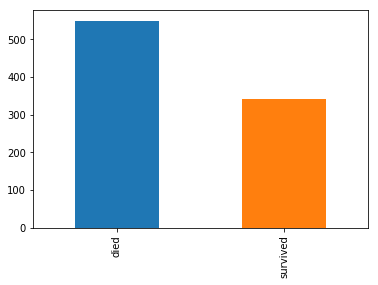

In [3]:
fig, ax = plt.subplots()
_ = df['Survived'].value_counts().plot.bar(ax=ax)
_ = ax.set_xticklabels(['died', 'survived'])

In [6]:
(df['Survived'] != 1).sum(),(df['Survived'] == 1).sum()

(549, 342)

In [7]:
p_surv = (df['Survived'] == 1).sum()/df['Survived'].count()
print(f"Probability of survival {p_surv}")

Probability of survival 0.3838383838383838


In [8]:
subset = df[['PassengerId','Survived',"Sex","Age"]]
subset.head()

,PassengerId,Survived,Sex,Age
0,1,0,male,22.0
1,2,1,female,38.0
2,3,1,female,26.0
3,4,1,female,35.0
4,5,0,male,35.0


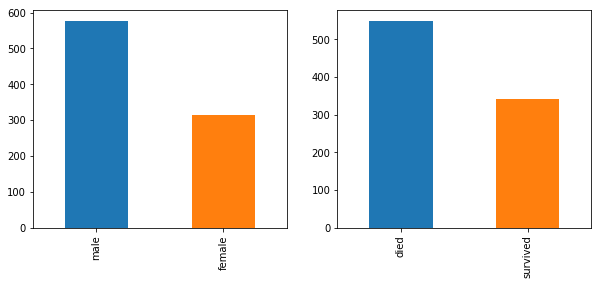

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10,4))
_ = subset['Sex'].value_counts().plot.bar(ax=ax1)
_ = subset['Survived'].value_counts().plot.bar(ax=ax2)
_ = ax2.set_xticklabels(['died', 'survived'])

In [21]:
gsub = subset[['Sex','Survived','PassengerId']].groupby(['Sex','Survived']).count()
gsub.unstack()

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

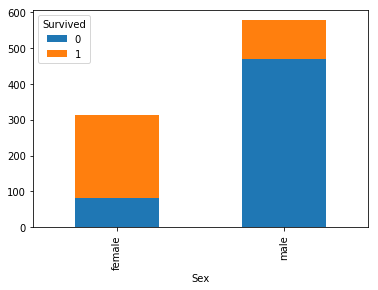

In [22]:
_ = gsub['PassengerId'].unstack().plot.bar(stacked=True)

In [23]:
men_surv = gsub['PassengerId'].unstack().T['male']
men_surv

Survived
0    468
1    109
Name: male, dtype: int64

In [26]:
female_surv = gsub['PassengerId'].unstack().T['female']
female_surv

Survived
0     81
1    233
Name: female, dtype: int64

$ P(\mbox{male}|\mbox{died}) = P(\mbox{died}|\mbox{male})P(\mbox{male})/P(\mbox{died})$

In [27]:
p_died = 1-p_surv 
p_died

0.6161616161616161

In [34]:
p_male = (1-subset['Sex'].str.contains('female')).sum()/subset['Sex'].count()
p_male

0.6475869809203143

$P(male|died)$

In [40]:
p_dead_men = (men_surv/men_surv.sum())[0]
p_dead_men 

0.8110918544194108

In [42]:
p_male_dead = p_dead_men * p_male/p_died
p_male_dead 

0.8524590163934428